In [2]:
import numpy as np
import sklearn
import pickle
import pandas as pd
import seaborn as sns
import scipy.stats
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Load the dataset
# There are 4 datasets. We will use the bank_full and bank_additional_full
df_full = pd.read_csv('bank-full.csv',sep=';')
df_addi_full = pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
# Create a new Consumer confidence index range column. Its values are negative.
df_addi_full['Conf_index_range_neg'] = pd.cut(df_addi_full['cons.conf.idx'], bins=[-55,-50,-45,-40,-35,-30,-25], labels=['55-50','50-45','45-40','40-35','35-30','30-25'])
# Create a new Euribor3m range column
df_addi_full['euribor3m_range'] = pd.cut(df_addi_full.euribor3m, bins=[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])
# Create a consumer price index range column
df_addi_full['cons_price_range'] = pd.cut(df_addi_full['cons.price.idx'], bins=[92,93,94,95], labels=['92-93','93-94','94-95'])
# Create Duration range 
df_addi_full['duration_range'] = pd.cut(df_addi_full['duration'], bins=[0,600,1200,1800,2400,3000,3600,4200,4800,5400], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
# Create age groups
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_addi_full['age_binned'] = pd.qcut(df_addi_full['age'], 4, labels = age_group_names)
df_addi_full['age_binned'].value_counts()
#Describing dummy keys of the output variable column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_addi_full['y_dummy'] = df_addi_full['y'].map(lambda x: y_n_lookup[x])
df_addi_full['y_dummy'].value_counts()
# Check the df
df_addi_full.head(20)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,Conf_index_range_neg,euribor3m_range,cons_price_range,duration_range,age_binned,y_dummy
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,lower middle,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,senior,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,middle,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,young,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,40-35,4-5,93-94,0-10,young,0


In [5]:
df_addi_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'Conf_index_range_neg', 'euribor3m_range', 'cons_price_range',
       'duration_range', 'age_binned', 'y_dummy'],
      dtype='object')

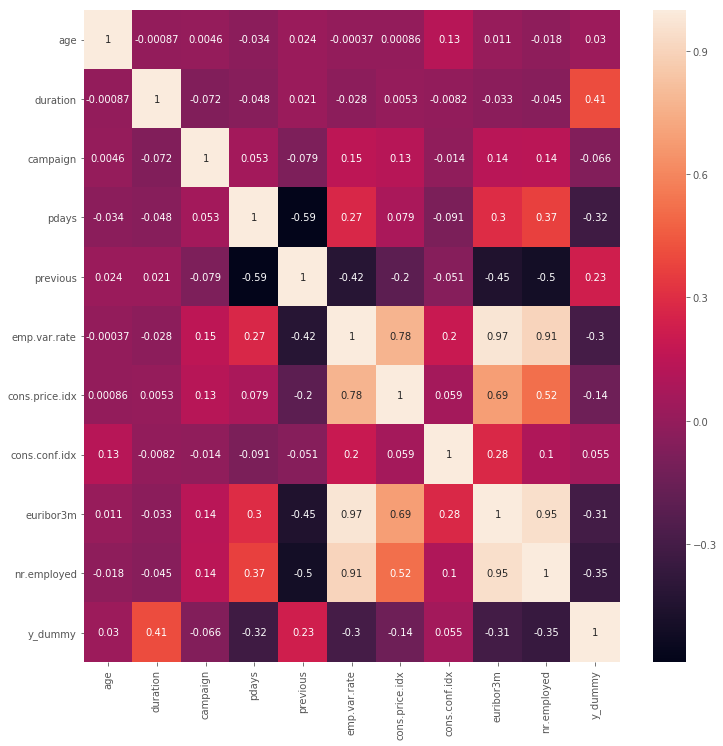

In [6]:
# What are the correlations between all columns?
plt.figure(figsize=(12,12))
#del df['ID']
sns.heatmap(df_addi_full.corr(), annot =True)
plt.show()

In [16]:
ct1 = pd.crosstab(df_addi_full['y_dummy'],df_addi_full['education'])
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)
print('Chi2 value for education, p-value, Expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y_dummy                                                            
0           0.89751  0.917976  0.921754     0.891645    0.777778   
1           0.10249  0.082024  0.078246     0.108355    0.222222   

education  professional.course  university.degree   unknown  
y_dummy                                                      
0                     0.886515           0.862755  0.854997  
1                     0.113485           0.137245  0.145003  
Chi2 value for education, p-value, Expected counts
(193.10590454149565, 3.3051890144025054e-38, 7, array([[  3.70555618e+03,   2.03379664e+03,   5.36400554e+03,
          8.44309556e+03,   1.59722249e+01,   4.65235418e+03,
          1.07972240e+04,   1.53599563e+03],
       [  4.70443819e+02,   2.58203360e+02,   6.80994464e+02,
          1.07190444e+03,   2.02777508e+00,   5.90645819e+02,
          1.37077595e+03,   1.95004370e+02]]))


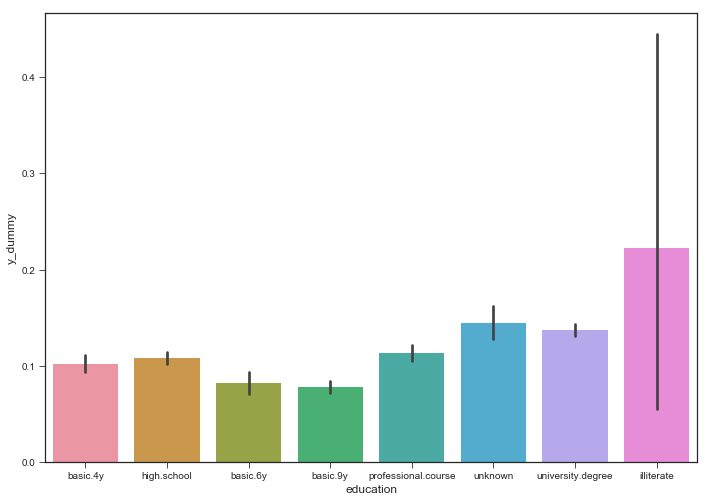

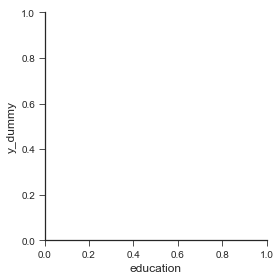

In [8]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.factorplot(x='education',y='y_dummy', data= df_addi_full, kind='bar',ax=ax)
sns.despine()


In [9]:
ct2 = pd.crosstab(df_addi_full['y_dummy'],df_addi_full['job'])
colsum = ct2.sum(axis=0)
colpct = ct2/colsum
print(colpct)
print('Chi2 value for job, p-value, Expected counts')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)

job        admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y_dummy                                                                         
0        0.870274     0.931057      0.914835        0.9    0.887825  0.747674   
1        0.129726     0.068943      0.085165        0.1    0.112175  0.252326   

job      self-employed  services   student  technician  unemployed   unknown  
y_dummy                                                                       
0             0.895144  0.918619  0.685714     0.89174    0.857988  0.887879  
1             0.104856  0.081381  0.314286     0.10826    0.142012  0.112121  
Chi2 value for job, p-value, Expected counts
(961.24244032895535, 4.1897632875638613e-199, 11, array([[ 9247.91822861,  8211.49830048,  1291.97552685,   940.58657862,
         2594.59920365,  1526.23482568,  1260.91842284,  3521.87559483,
          776.42760027,  5983.37292415,   899.76867049,   292.82412353],
       [ 1174.08177139,  1042.50169952,   164.0

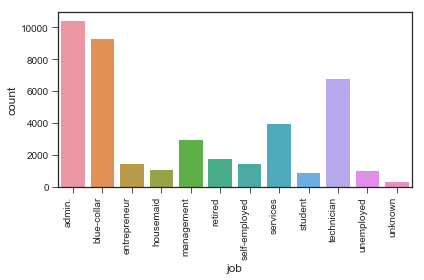

In [10]:
# What are the different job categories and what are their numbers
df_jobs = df_addi_full.sort_values(by=['job'])
ax = sns.countplot(x="job", data=df_jobs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

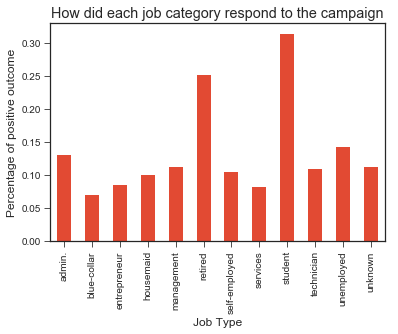

In [11]:
# How did each job category respond to the campaigns
job_type = df_jobs.groupby('job')['y_dummy'].mean()
job_type.plot(x='job_type', y = 'y_dummy', kind = 'bar')
plt.xlabel('Job Type')
plt.ylabel('Percentage of positive outcome')
plt.title('How did each job category respond to the campaign')
plt.show()

In [12]:
ct3 = pd.crosstab(df_addi_full['y_dummy'],df_addi_full['day_of_week'])
colsum = ct3.sum(axis=0)
colpct = ct3/colsum
print(colpct)
print('Chi2 value for day of week, p-value, Expected counts')
cs3 = scipy.stats.chi2_contingency(ct3)
print(cs3)

day_of_week       fri       mon       thu     tue       wed
y_dummy                                                    
0            0.891913  0.900517  0.878812  0.8822  0.883329
1            0.108087  0.099483  0.121188  0.1178  0.116671
Chi2 value for day of week, p-value, Expected counts
(26.144939075871971, 2.9584820052785324e-05, 4, array([[ 6945.25580266,  7554.8623871 ,  7651.58308245,  7178.62775566,
         7217.67097213],
       [  881.74419734,   959.1376129 ,   971.41691755,   911.37224434,
          916.32902787]]))


In [13]:
ct4 = pd.crosstab(df_addi_full['y_dummy'],df_addi_full['month'])
colsum = ct4.sum(axis=0)
colpct = ct4/colsum
print(colpct)
print('Chi2 value for month, p-value, Expected counts')
cs4 = scipy.stats.chi2_contingency(ct4)
print(cs4)

month         apr       aug       dec       jul       jun       mar       may  \
y_dummy                                                                         
0        0.795213  0.893979  0.510989  0.909534  0.894885  0.494505  0.935653   
1        0.204787  0.106021  0.489011  0.090466  0.105115  0.505495  0.064347   

month         nov       oct       sep  
y_dummy                                
0        0.898561  0.561281  0.550877  
1        0.101439  0.438719  0.449123  
Chi2 value for month, p-value, Expected counts
(3101.1493514116773, 0.0, 9, array([[  2335.49422162,   5482.02253083,    161.49694086,   6365.8189764 ,
          4718.905118  ,    484.49082257,  12217.86471788,   3639.00524425,
           637.11430514,    505.78712246],
       [   296.50577838,    695.97746917,     20.50305914,    808.1810236 ,
           599.094882  ,     61.50917743,   1551.13528212,    461.99475575,
            80.88569486,     64.21287754]]))


In [17]:
ct5 = pd.crosstab(df_addi_full['y_dummy'],df_addi_full['marital'])
colsum = ct5.sum(axis=0)
colpct = ct5/colsum
print(colpct)
print('Chi2 value for marital, p-value, Expected counts')
cs5 = scipy.stats.chi2_contingency(ct5)
print(cs5)

marital  divorced   married    single  unknown
y_dummy                                       
0        0.896791  0.898427  0.859959     0.85
1        0.103209  0.101573  0.140041     0.15
Chi2 value for marital, p-value, Expected counts
(122.65515182252989, 2.0680146484422109e-26, 3, array([[  4.09243896e+03,   2.21197568e+04,   1.02648165e+04,
          7.09876663e+01],
       [  5.19561037e+02,   2.80824318e+03,   1.30318345e+03,
          9.01233369e+00]]))
